In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'day.csv')

In [2]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


## Data Dictionary

    - instant: record index
	- dteday : date
	- season : season (1:winter, 2:spring, 3:summer, 4:fall)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
	- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

The Index can be removed as it represents the index which we already have for dataframe by default.

In [3]:
df = df.drop(df.columns[[0]],axis=1)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.shape

(731, 15)

In [5]:
#Column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


All the columns seems to be mapped to the correct datatype.

In [6]:
df.drop_duplicates(inplace=True)
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


The shape of dataset before and after removing duplicates is same showing there are no duplicates in the dataset.

In [7]:
df.count()

dteday        731
season        731
yr            731
mnth          731
holiday       731
weekday       731
workingday    731
weathersit    731
temp          731
atemp         731
hum           731
windspeed     731
casual        731
registered    731
cnt           731
dtype: int64

In [8]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values and the data for all the rows is available for all the columns of the dataset

The temperature related columns "temp" and "atemp" are normalised values.

So, using the formula lets convert to the normal temperature in Celsius units.

The same normalised values are given for humidity and windspeed columns.

So, converting those columns to normal values as well.

In [9]:
t_min = -8
t_max = 39

# Apply the formula to transform the values back to the original values
df['temp'] = (df['temp']* (t_max - t_min)) - t_min

t_min = -16
t_max = 50

# Apply the formula to transform the values back to the original values
df['atemp'] = (df['atemp']* (t_max - t_min)) - t_min

df['hum'] = df['hum'] * 100
df['windspeed'] = df['windspeed'] * 67

df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,24.175849,39.999250,80.5833,10.749882,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,25.083466,39.346774,69.6087,16.652113,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,17.229108,28.500730,43.7273,16.636703,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,17.400000,30.000052,59.0435,10.739832,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,18.666979,31.131820,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,19.945849,30.958372,65.2917,23.458911,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,19.906651,32.833036,59.0000,10.416557,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,19.906651,31.998400,75.2917,8.333661,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,20.024151,31.292200,48.3333,23.500518,364,1432,1796


In [10]:
#value counts for each column

for col in df:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(df[col].value_counts())

----------------------------------------dteday---------------------------------------- - 

dteday
2011-01-01    1
2012-04-25    1
2012-04-27    1
2012-04-28    1
2012-04-29    1
             ..
2011-09-03    1
2011-09-04    1
2011-09-05    1
2011-09-06    1
2012-12-31    1
Name: count, Length: 731, dtype: int64

----------------------------------------season---------------------------------------- - 

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

----------------------------------------yr---------------------------------------- - 

yr
1    366
0    365
Name: count, dtype: int64

----------------------------------------mnth---------------------------------------- - 

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: count, dtype: int64

----------------------------------------holiday---------------------------------------- - 

holiday
0    710
1     21
Name: count, dtype: int64

----------------------------------------weekday---------------------------------------- - 

weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64

----------------------------------------workingday---------------------------------------- - 

workingday
1    500
0    231
Name: count, dtype: int64

----------------------------------------weathersit---------------------------------------- - 

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

----------------------------------------temp---------------------------------------- - 

temp
37.845000    5
20.494151    5
39.960000    4
41.409151    4
34.515849    4
            ..
39.450849    1
38.236651    1
41.231773    1
40.900000    1
18.144151    1
Name: count, Length: 499, dtype: int64

----------------------------------------atemp---------------------------------------- - 

atemp
59.209408    4
40.790986    3
58.042528    3
53.750350    2
46.790650    2
            ..
54.210436    1
56.209114    1
55.740580    1
57.375400    1
30.750142    1
Name: count, Length: 690, dtype: int64

----------------------------------------hum---------------------------------------- - 

hum
61.3333    4
60.5000    3
59.0000    3
53.8333    3
69.0000    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.1250    1
57.7500    1
Name: count, Length: 595, dtype: int64

----------------------------------------windspeed---------------------------------------- - 

windspeed
9.041918     3
15.333486    3
9.166739     3
7.416900     3
7.959064     3
            ..
13.833289    1
14.250632    1
23.044181    1
6.500394     1
10.374682    1
Name: count, Length: 650, dtype: int64

----------------------------------------casual---------------------------------------- - 

casual
120     4
968     4
163     3
653     3
123     3
       ..
2521    1
1935    1
783     1
688     1
364     1
Name: count, Length: 606, dtype: int64

----------------------------------------registered---------------------------------------- - 

registered
4841    3
6248    3
1707    3
3461    2
2713    2
       ..
3231    1
4018    1
3077    1
2921    1
2290    1
Name: count, Length: 679, dtype: int64

----------------------------------------cnt---------------------------------------- - 

cnt
5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5046    1
4713    1
4763    1
4785    1
2729    1
Name: count, Length: 696, dtype: int64

The date count is 731 meaning each record is of each day total of 731 days data is present in the dataset.

Year column where 1:2012 and 0:2011. The dataset contains data of each day of the 2 years considered.

Looking at the workingday column, Neither weekend nor holiday meaning it is a weekday and a work day is taken as 1.

The count of holidays is only 21 when considered the holiday column. But, when looked at working day column, 231 days are considered to be holidays (other than working days). They should have taken the no.of weekends and the holiday count.

No.of weekends in 2011 and 2012 are 105 each and considering the 21 holidays count is 231. Meaning no holiday has come on weekends and all holidays are on weekdays.

Looking at weathersit column, there are only 1,2 and 3 situations of weather. 4 situation is no where seen during the 2 year period.





In [11]:
df.to_csv('Bike_Rental.csv')

In [12]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,31.283085,47.307363,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,8.603397,10.755438,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,10.779129,21.218594,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,23.842925,38.297605,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,31.421651,48.124378,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,38.804575,56.167732,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,48.498349,71.499136,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Type "1" weather situation is appeared more than 50% of times.

The mean temperature is around 31C where the temperature is felt to be 47C.

The windspeed is majorly around 13 m/s while the humidity is around 62.

In [13]:
df.describe(include='O')

,dteday
count,731
unique,731
top,2011-01-01
freq,1


array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>, <Axes: >, <Axes: >]],
      dtype=object)

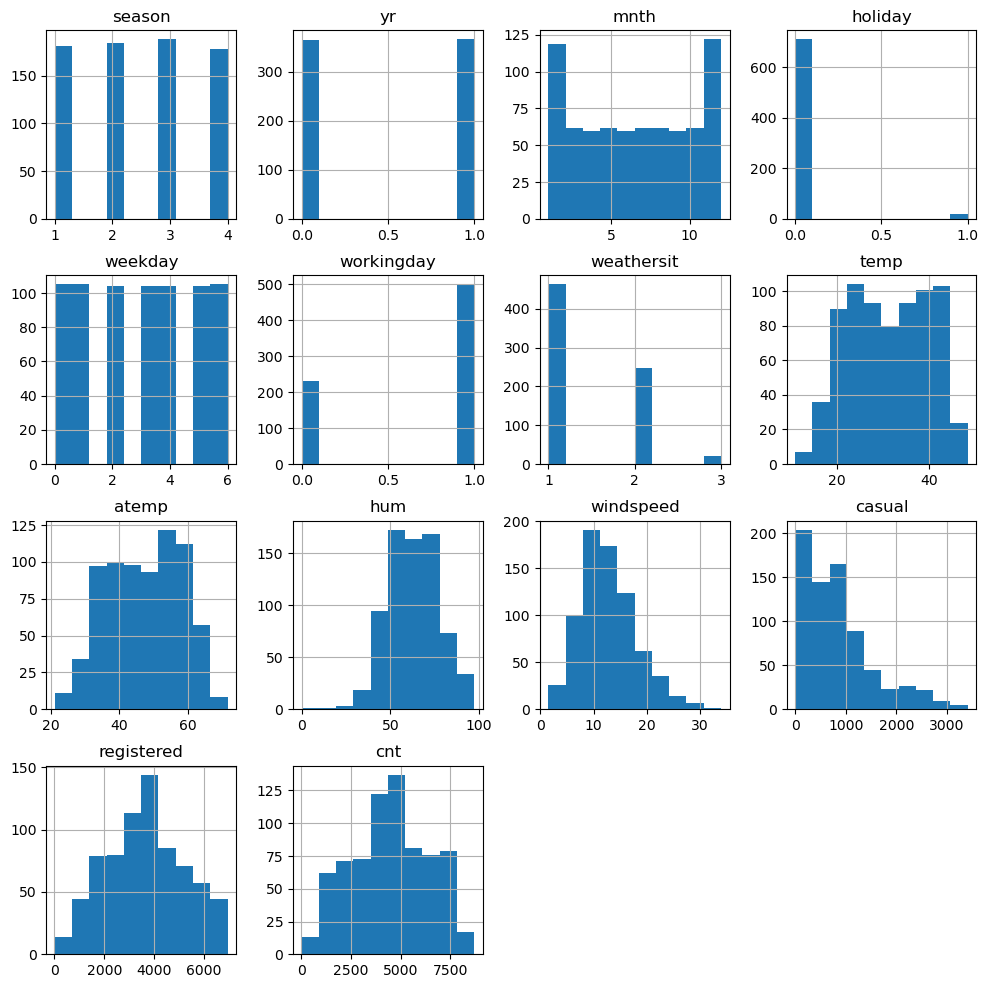

In [14]:
#checking for overall distribution of parameters
df.hist(figsize=(12,12))

season           Axes(0.125,0.747241;0.133621x0.132759)
yr            Axes(0.285345,0.747241;0.133621x0.132759)
mnth           Axes(0.44569,0.747241;0.133621x0.132759)
holiday       Axes(0.606034,0.747241;0.133621x0.132759)
weekday       Axes(0.766379,0.747241;0.133621x0.132759)
workingday       Axes(0.125,0.587931;0.133621x0.132759)
weathersit    Axes(0.285345,0.587931;0.133621x0.132759)
temp           Axes(0.44569,0.587931;0.133621x0.132759)
atemp         Axes(0.606034,0.587931;0.133621x0.132759)
hum           Axes(0.766379,0.587931;0.133621x0.132759)
windspeed        Axes(0.125,0.428621;0.133621x0.132759)
casual        Axes(0.285345,0.428621;0.133621x0.132759)
registered     Axes(0.44569,0.428621;0.133621x0.132759)
cnt           Axes(0.606034,0.428621;0.133621x0.132759)
dtype: object

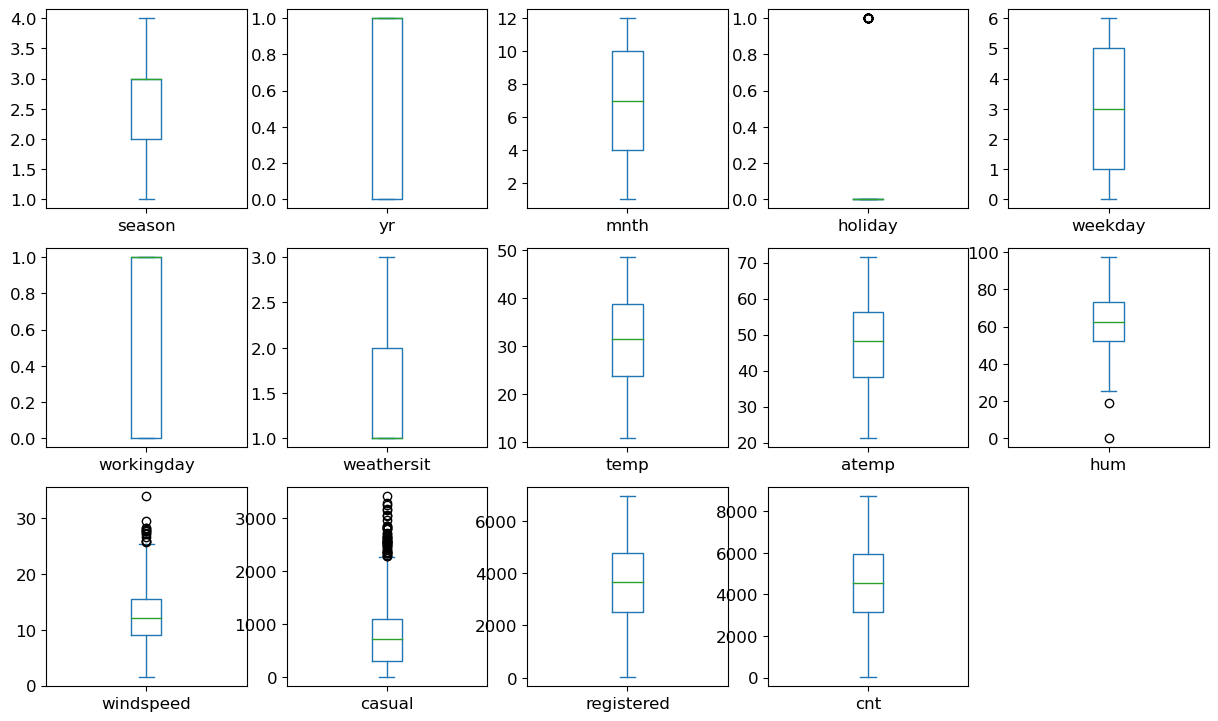

In [15]:
#checking for outliers
df.plot(kind='box', subplots=True,layout=(5,5),fontsize=12,figsize=(15,15))

<Axes: >

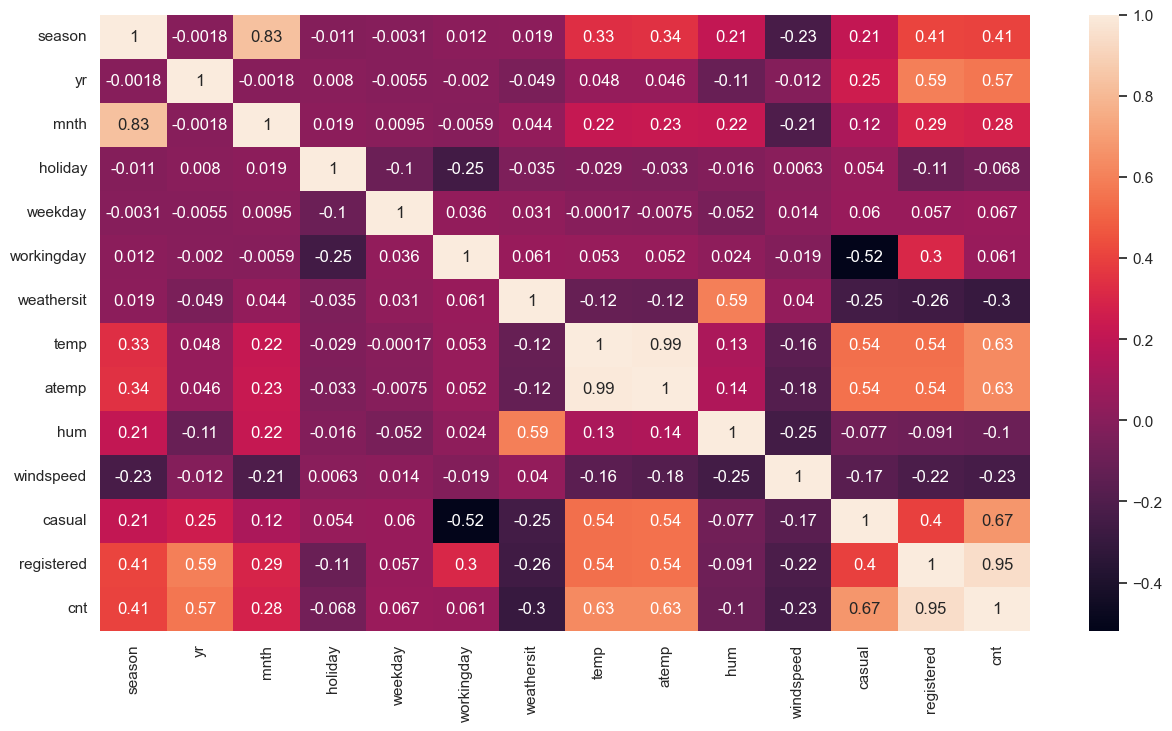

In [16]:
df1 =df[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']]
corelation=df1.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corelation,annot=True)

season --> mnth,temp,atemp,hum,casual,registered,cnt

yr --> casual,registered,cnt

mnth --> temp,atemp,hum,registered,cnt

workingday --> registered

weathesit --> hum

temp --> atemp,hum,casual,registered,cnt

atemp --> casual,registered,cnt

windspeed, holiday,weekday are not much related to other columns

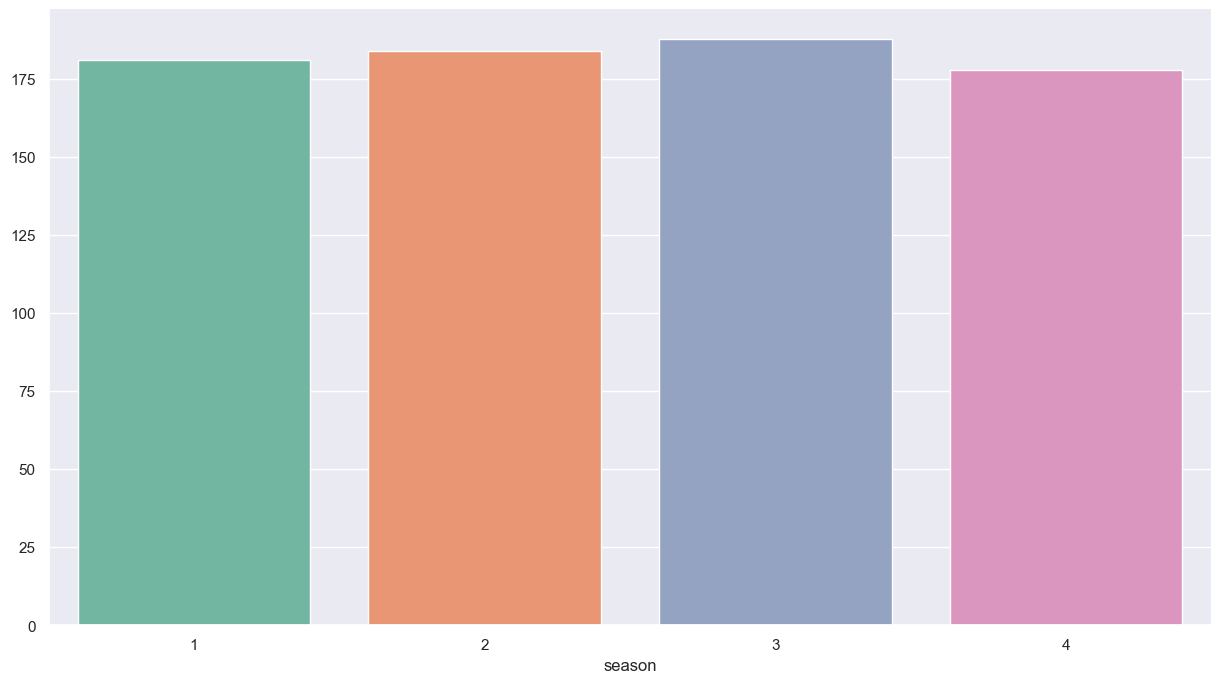

In [109]:
# Set the color palette
sns.set_palette(sns.color_palette("Set2"))
# Plot the data, specifying a different color for data points in
ax = sns.countplot(x='season',data=df)
# Customize the axes and title
ax.set_title("")
ax.set_xlabel("season")
ax.set_ylabel("")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

All the seasons seems to almost equal.

The length of summer is slightly more than the other seasons but not that much considerable difference.

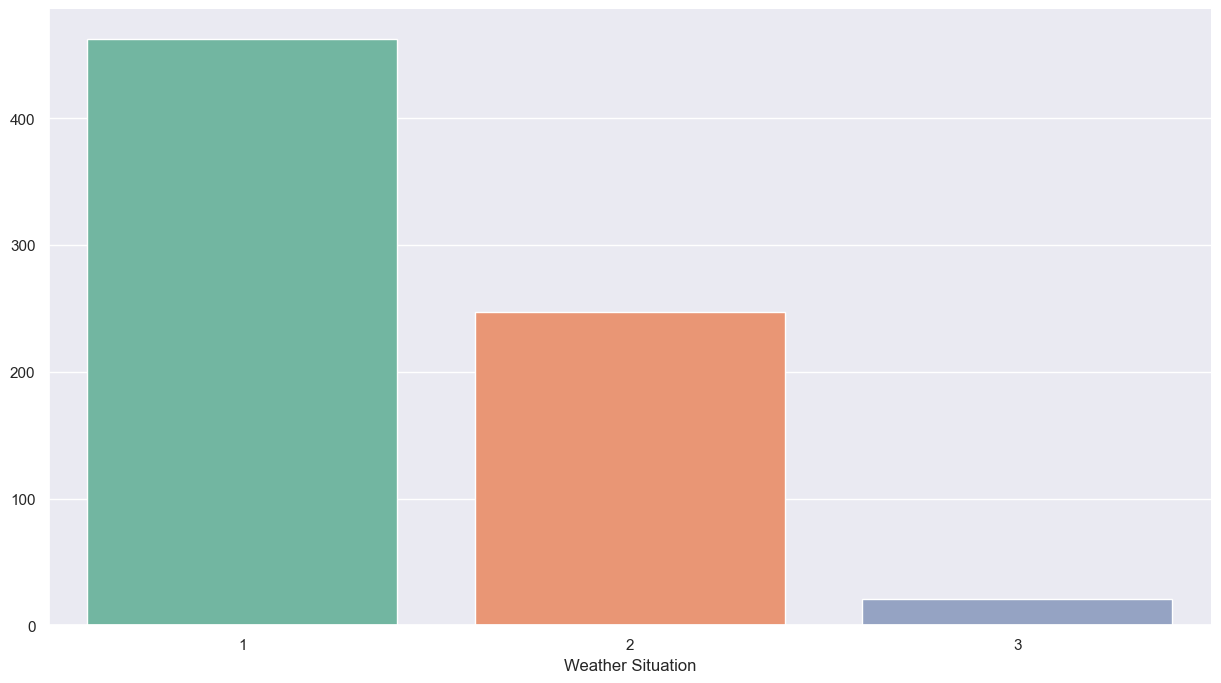

In [18]:
# Set the color palette
sns.set_palette(sns.color_palette("Set2"))
# Plot the data, specifying a different color for data points in
ax = sns.countplot(x='weathersit',data=df)
# Customize the axes and title
ax.set_title("")
ax.set_xlabel("Weather Situation")
ax.set_ylabel("")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
For most of the days, the weather situation seems to be of type 1.

While there are no days where the weather situation is of type 4. Which is a considerable thing as all the seasons are equally distributed, how can there be no days of heavy rains or the days without fog?

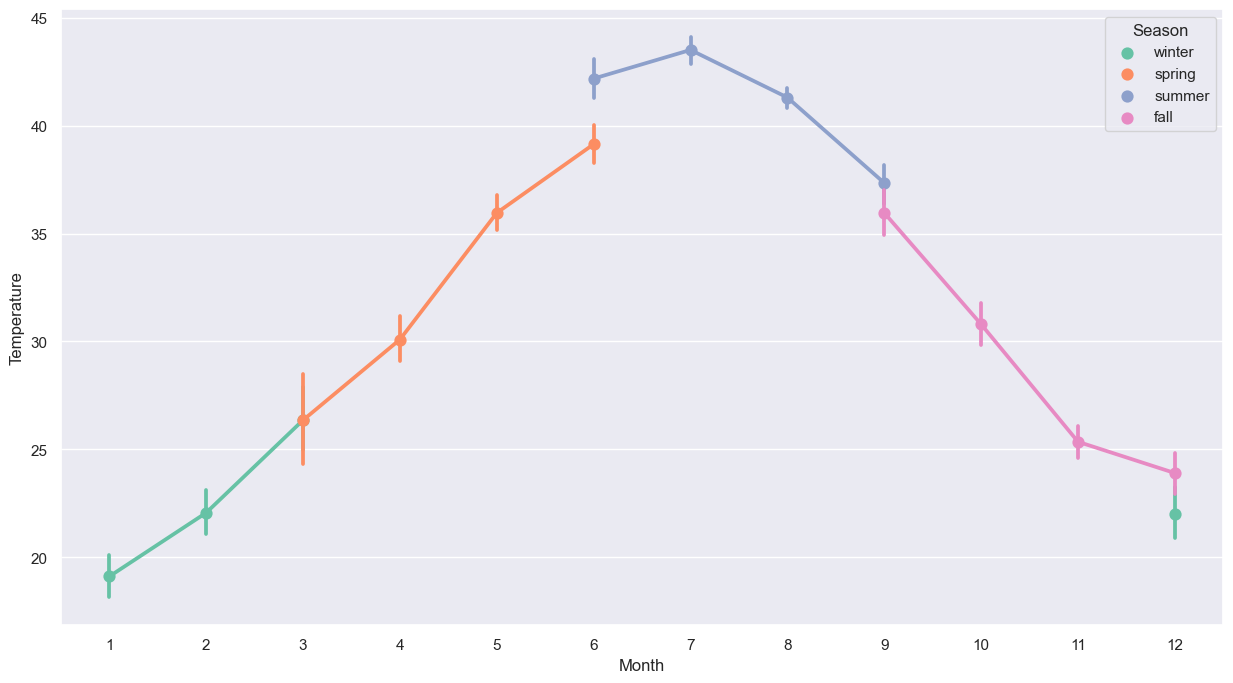

In [19]:
labels=["winter", "spring", "summer", "fall"]
ax = sns.pointplot(y='temp',x='mnth',data=df,hue='season',palette='Set2')
h,l = ax.get_legend_handles_labels()
ax.legend(h,labels,title="Season")
# Customize the axes and title
ax.set_title("")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature")
plt.show()

Most of the months in a year is either summer or spring followed by 3 months of having fall & winter season.

So, as observed thats why the seasons seemed to be distributed equally.

Coming to the temperatures, the temperatures are seen raisng till spring and falling from summer. The values are normalized so it is following the perfect bell shape.

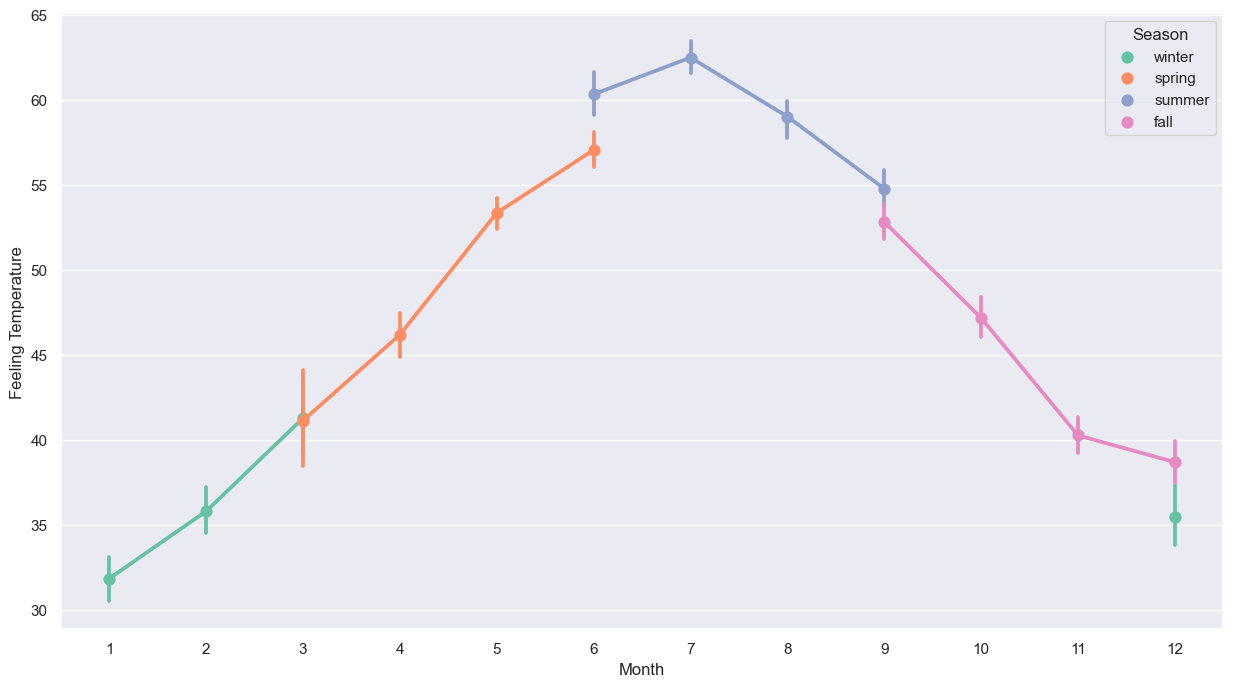

In [20]:
labels=["winter", "spring", "summer", "fall"]
ax = sns.pointplot(y='atemp',x='mnth',data=df,hue='season',palette='Set2')
h,l = ax.get_legend_handles_labels()
ax.legend(h,labels,title="Season")
# Customize the axes and title
ax.set_title("")
ax.set_xlabel("Month")
ax.set_ylabel("Feeling Temperature")
plt.show()

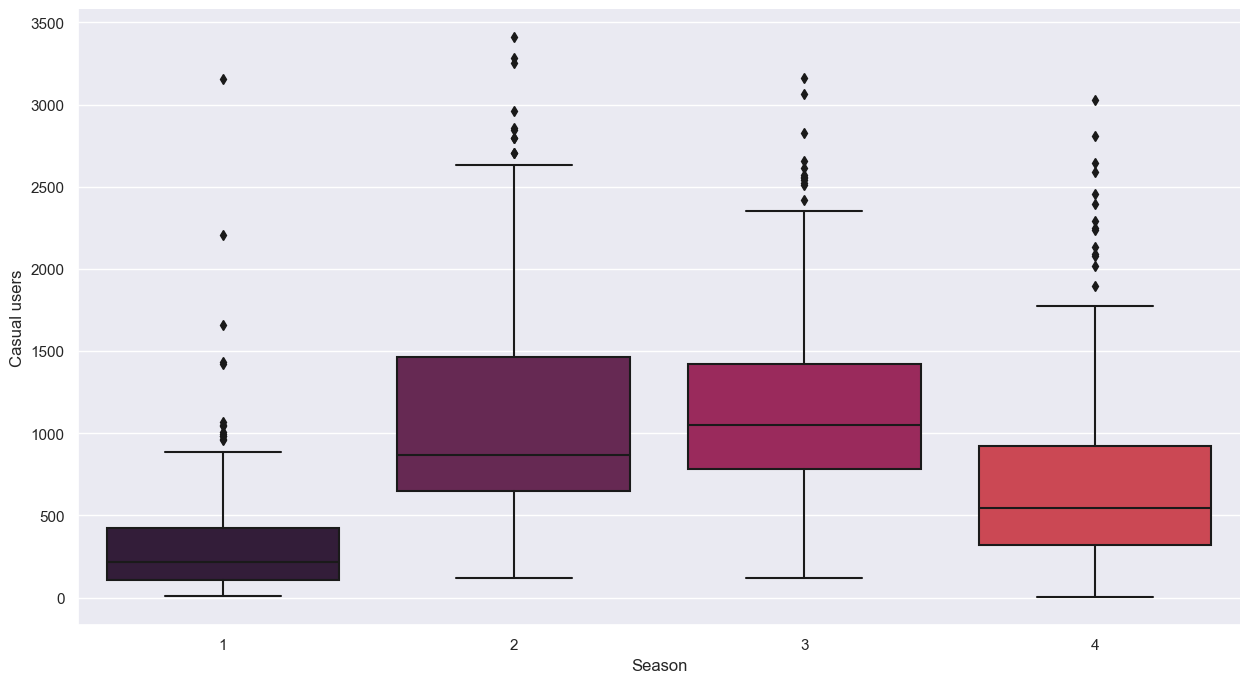

In [21]:
# Set the color palette
sns.set_palette(sns.color_palette("rocket"))
# Plot the data, specifying a different color for data points in
ax = sns.boxplot(x='season',y='casual',data=df)
# Customize the axes and title
ax.set_title("")
ax.set_xlabel("Season")
ax.set_ylabel("Casual users")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

The Casual users usage of the bike rentals is more during spring and summer compared to the other 2 seasons.

In particular, more than 75% of the bookings in spring season are observed to be from casual users.

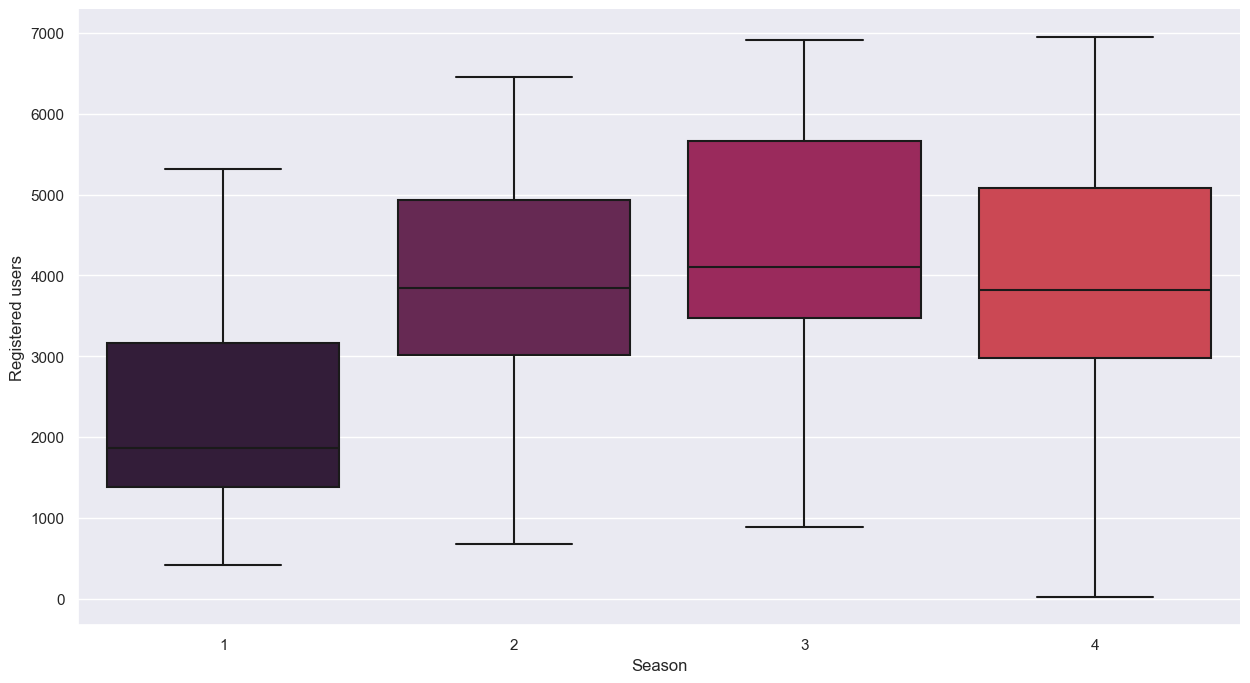

In [22]:
# Set the color palette
sns.set_palette(sns.color_palette("rocket"))
# Plot the data, specifying a different color for data points in
ax = sns.boxplot(x='season',y='registered',data=df)
# Customize the axes and title
ax.set_title("")
ax.set_xlabel("Season")
ax.set_ylabel("Registered users")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

The bookings from registered users is more when compared to the casual users in all seasons.

However, bikes are being booked comparitively more in summer and very less in winter season.

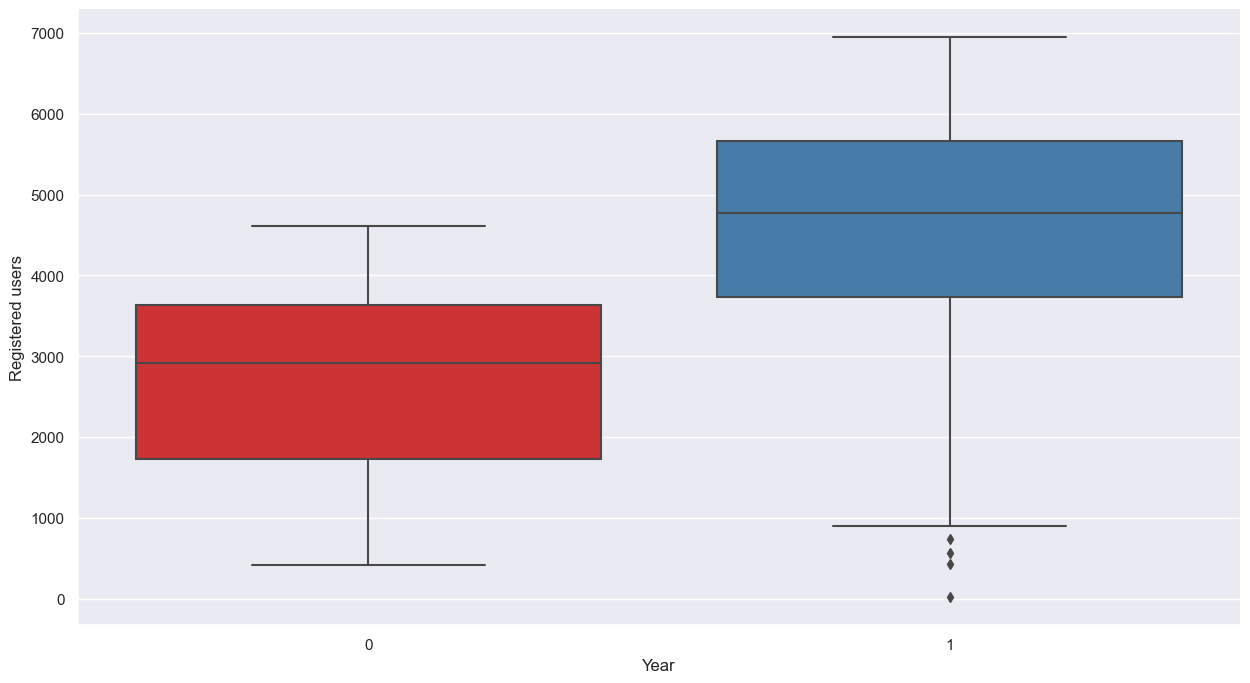

In [23]:
# Set the color palette
sns.set_palette(sns.color_palette("Set1"))
# Plot the data, specifying a different color for data points in
ax = sns.boxplot(x='yr',y='registered',data=df)
# Customize the axes and title
ax.set_title("")
ax.set_xlabel("Year")
ax.set_ylabel("Registered users")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

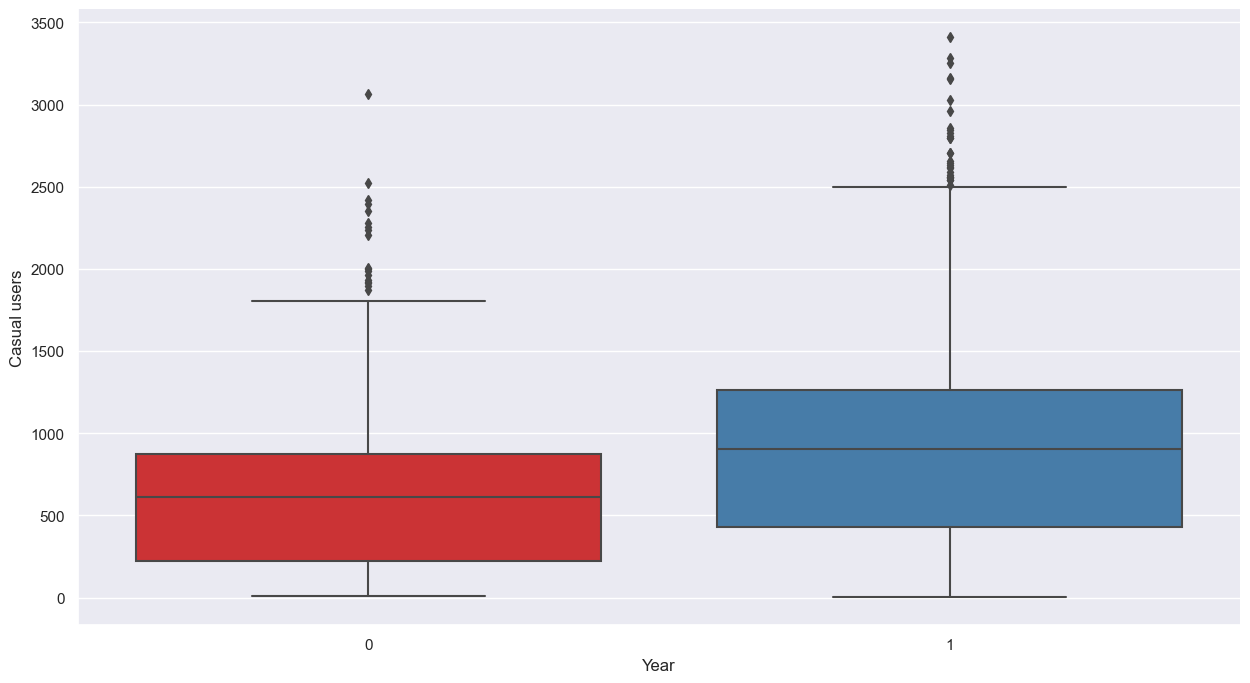

In [24]:
# Set the color palette
sns.set_palette(sns.color_palette("Set1"))
# Plot the data, specifying a different color for data points in
ax = sns.boxplot(x='yr',y='casual',data=df)
# Customize the axes and title
ax.set_title("")
ax.set_xlabel("Year")
ax.set_ylabel("Casual users")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

The bookings received from registered users increased in 2012 compared to that of 2011.

While there is only a little increase in bookings from casual users in 2012 than 2011.

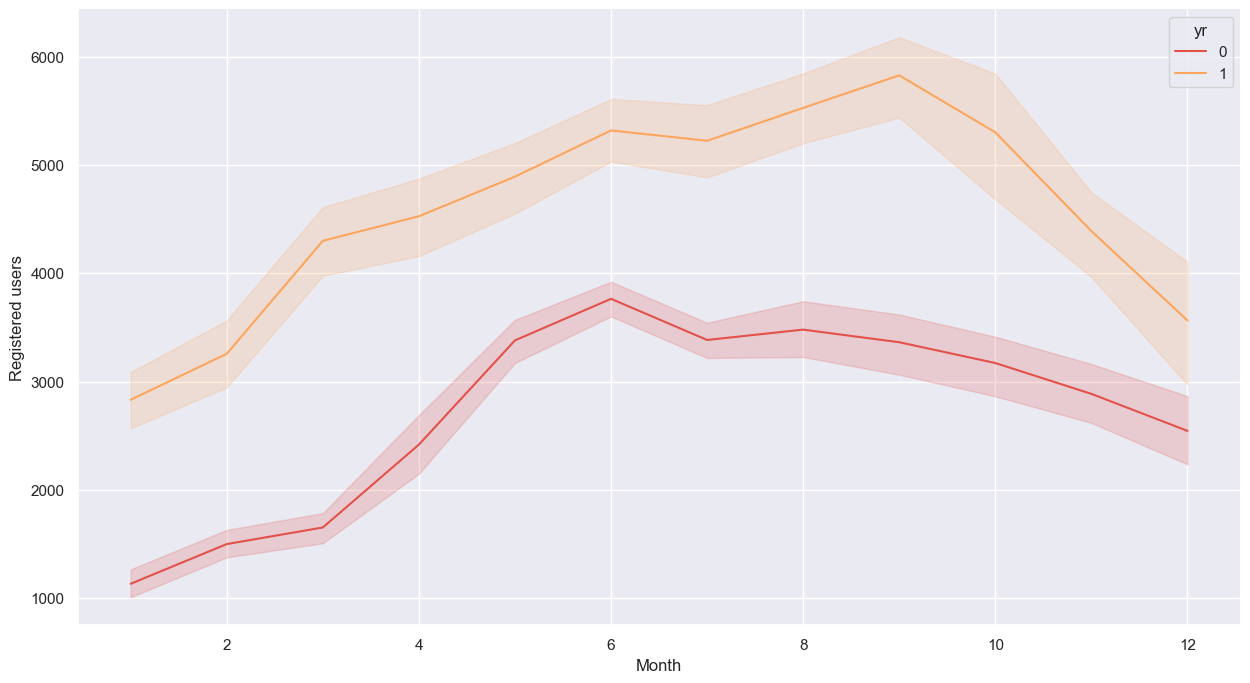

In [33]:
# Set the color palette
sns.set_palette(sns.color_palette("Spectral"))
# Plot the data, specifying a different color for data points in
ax = sns.lineplot(x='mnth',y='registered',data=df,hue = 'yr')
# Customize the axes and title
ax.set_title("")
ax.set_xlabel("Month")
ax.set_ylabel("Registered users")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

There is an increase in good number of registered users from 2011 to 2012.

We can also see the bookings have also improved considerable.

The bookings have increased notably during the summer season.

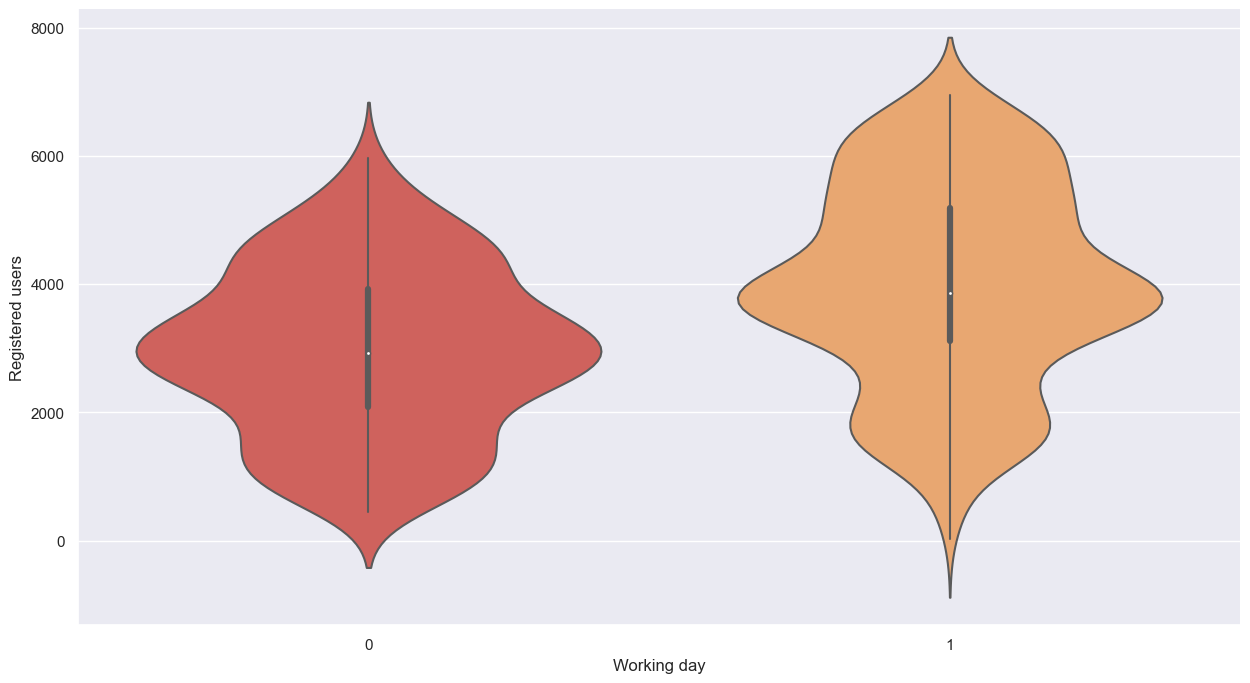

In [45]:
# Set the color palette
sns.set_palette(sns.color_palette("Spectral"))
# Plot the data, specifying a different color for data points in
ax = sns.violinplot(x='workingday',y='registered',data=df)
# Customize the axes and title
ax.set_title("")
ax.set_xlabel("Working day")
ax.set_ylabel("Registered users")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

The bookings are observed to be more during working days rather than holidays or weekends.


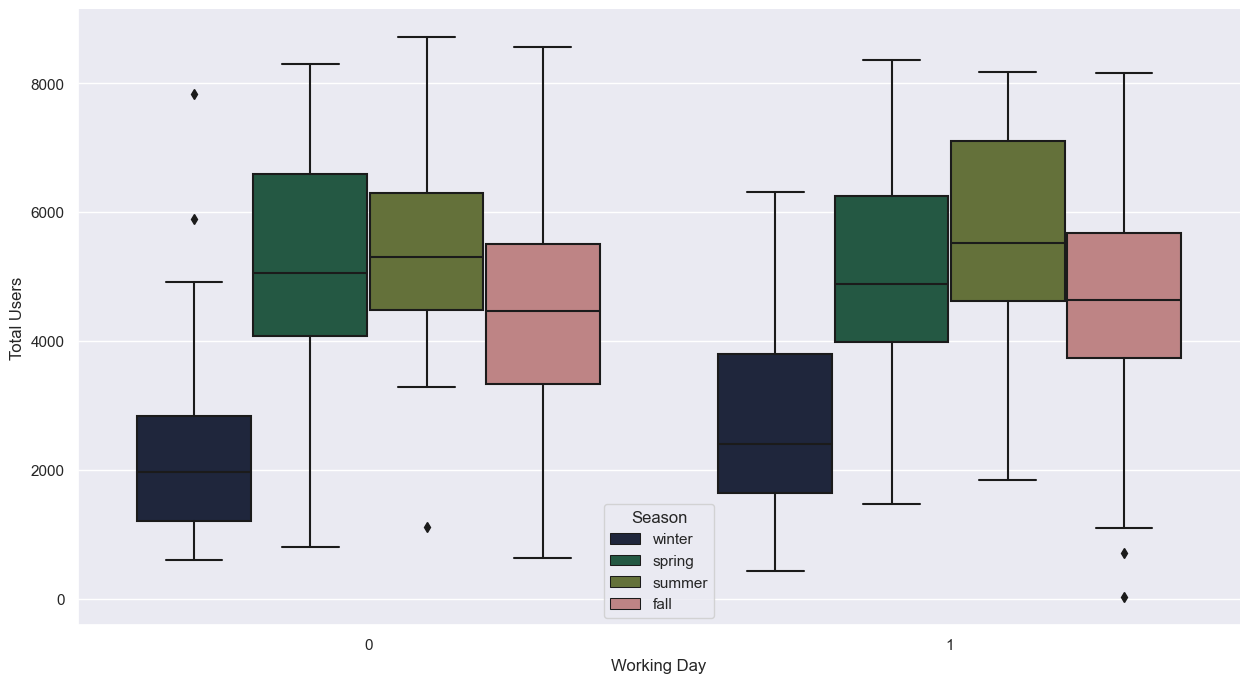

In [92]:
# Set the color palette
sns.set_palette(sns.color_palette("cubehelix"))
# Plot the data, specifying a different color for data points in
labels=["winter", "spring", "summer", "fall"]
ax = sns.boxplot(x='workingday',y='cnt',data=df,hue ='season')
h,l = ax.get_legend_handles_labels()
ax.legend(h,labels,title="Season")
# Customize the axes and title
ax.set_title("")
ax.set_xlabel("Working Day")
ax.set_ylabel("Total Users")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

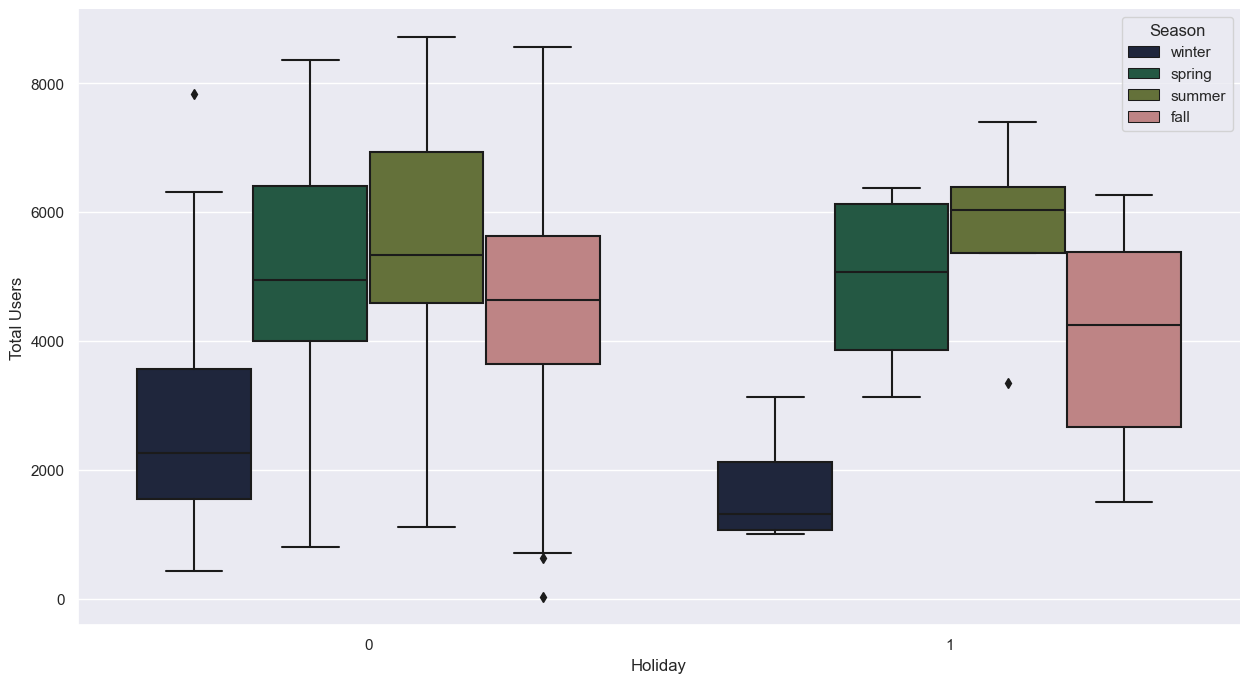

In [66]:
# Set the color palette
sns.set_palette(sns.color_palette("cubehelix"))
# Plot the data, specifying a different color for data points in
labels=["winter", "spring", "summer", "fall"]
ax = sns.boxplot(x='holiday',y='cnt',data=df,hue ='season')
h,l = ax.get_legend_handles_labels()
ax.legend(h,labels,title="Season")
# Customize the axes and title
ax.set_title("")
ax.set_xlabel("Holiday")
ax.set_ylabel("Total Users")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

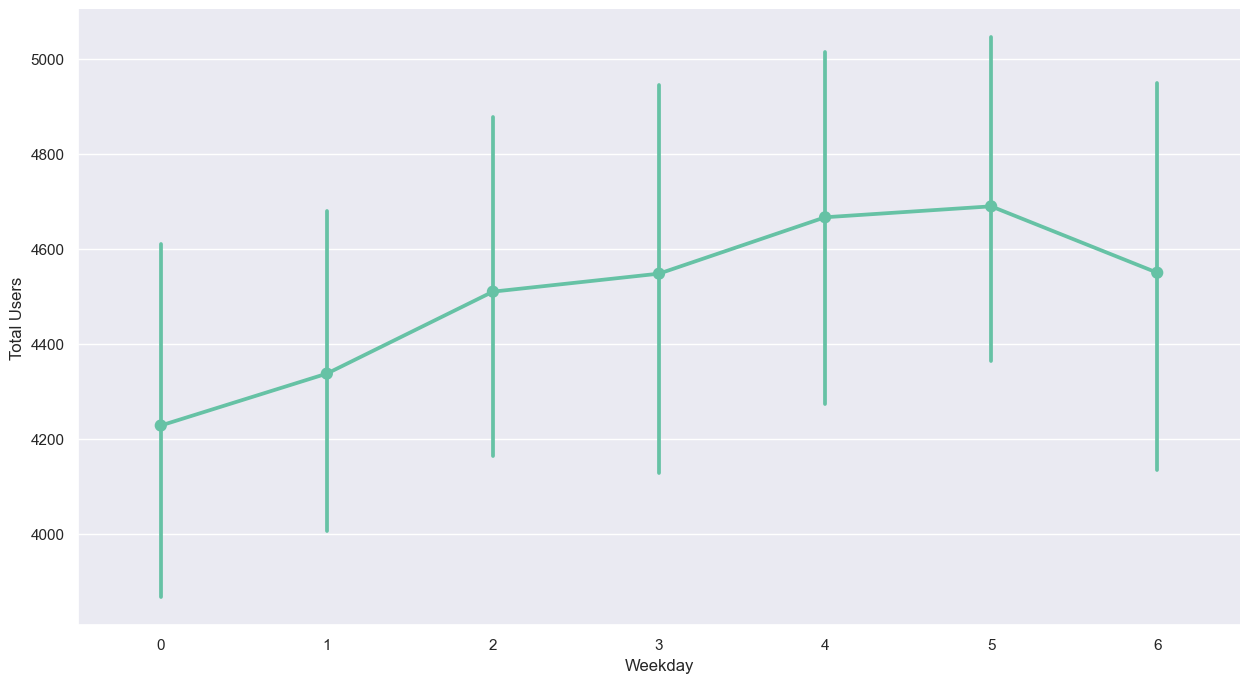

In [108]:
#Set the color palette
sns.set_palette(sns.color_palette("Set2"))
#Plot the data, specifying a different color for data points in
ax = sns.pointplot(x='weekday',y='cnt',data=df)
#Customize the axes and title
ax.set_title("")
ax.set_xlabel("Weekday")
ax.set_ylabel("Total Users")
#Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

The bike rentals are being more in mid week during working days than the weekends and holidays.

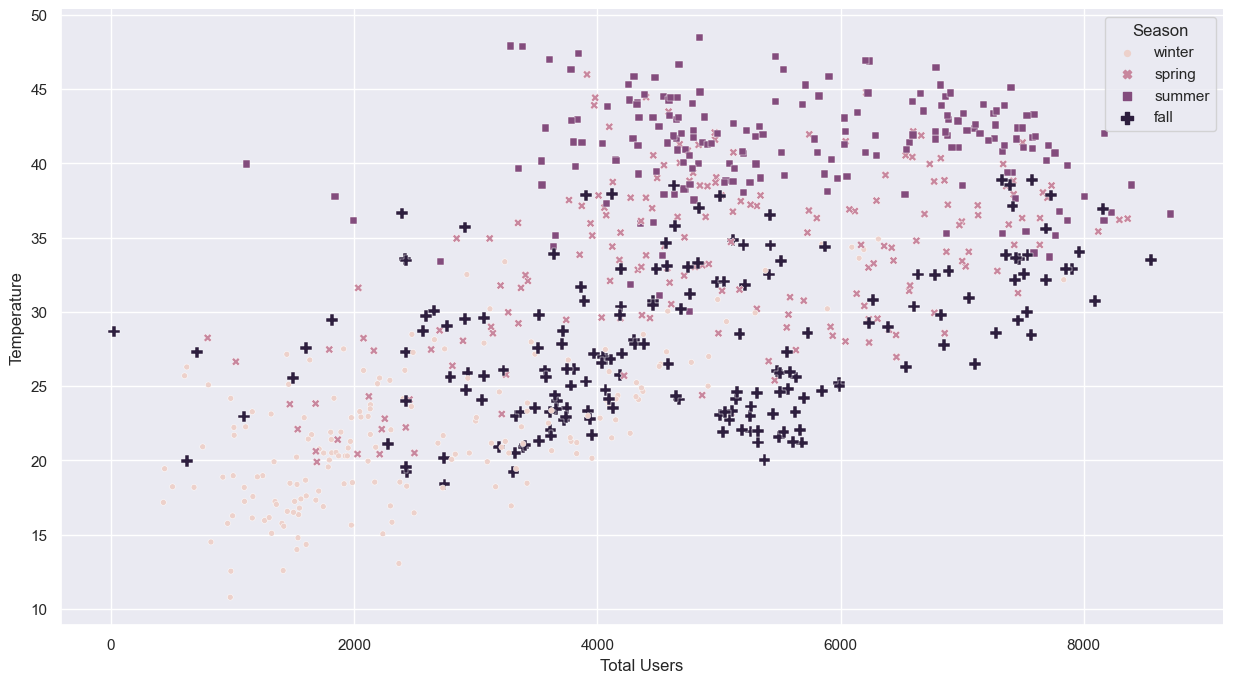

In [104]:
# Set the color palette
colors = ["#FF0B04", "#4374B3","#DB3E79","#B7934F"]
sns.set_palette(sns.color_palette(colors))
# Plot the data, specifying a different color for data points in
labels=["winter", "spring", "summer", "fall"]
ax = sns.scatterplot(x='cnt',y='temp',data=df,hue='season',style = 'season',size = 'season')
h,l = ax.get_legend_handles_labels()
ax.legend(h,labels,title="Season")
# Customize the axes and title
ax.set_title("")
ax.set_xlabel("Total Users")
ax.set_ylabel("Temperature")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

During summer and fall seasons when the temperature is above 20C, the booking seems to be consistent regardless of the temperature.

While during winters, the bookings are very less for bikes as the temperatures are very low and bike travel is not feasible.

Coming to spring, the bookings are being very high in number.

In winters where the temperature is below 20, the bookings are very low as travel by bikes is not feasible.( Upto 2000 users)

In spring season, the bookings are very high when the temperature is in between 25C to 45C. (Majorly between 2000 to 8000 users)

Summer season has the bookings when the temperatures are between 35C to 50C. (4000 to 8000 users)

The fall season booking seems to be consistent where the temperature is ranging between 20C to 40C. (Upto 8000 users)

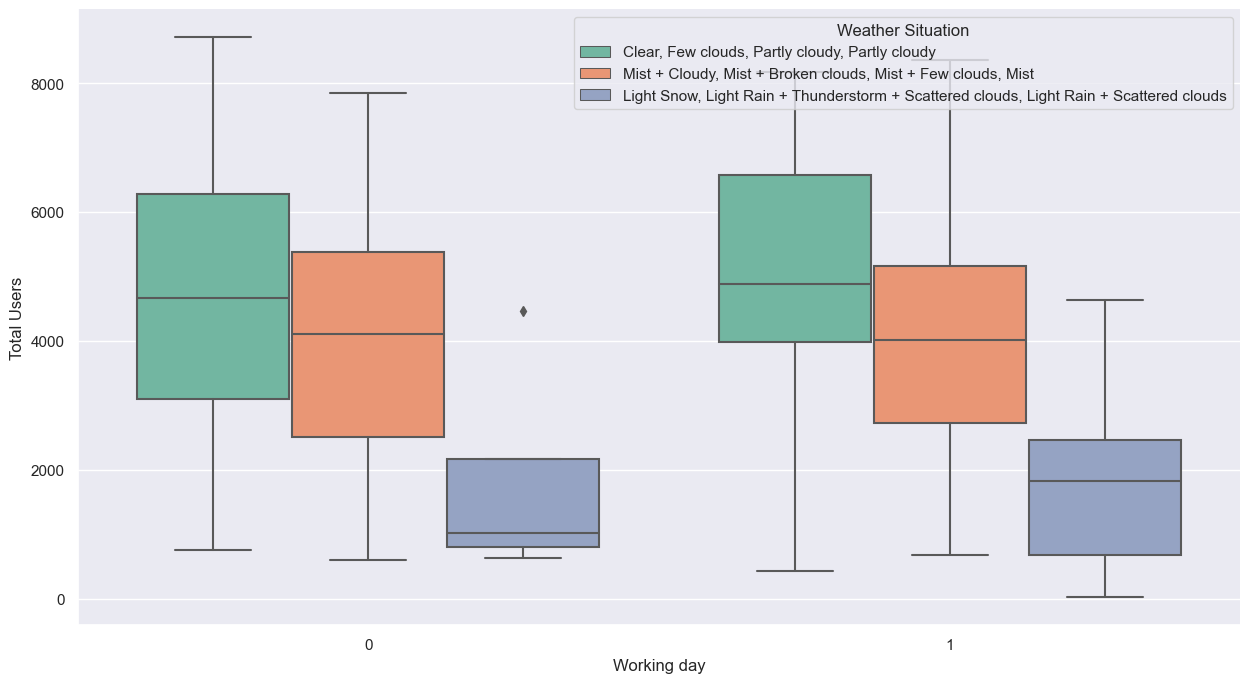

In [106]:
# Set the color palette
sns.set_palette(sns.color_palette("Set2"))
# Plot the data, specifying a different color for data points in
ax = sns.boxplot(x='workingday',y='cnt',data=df,hue='weathersit')
labels=["Clear, Few clouds, Partly cloudy, Partly cloudy", "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist", "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"]
h,l = ax.get_legend_handles_labels()
ax.legend(h,labels,title="Weather Situation")
# Customize the axes and title
ax.set_title("")
ax.set_xlabel("Working day")
ax.set_ylabel("Total Users")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

During a working day when the weather situation is clear and partly cloudy, then the bike rentals are booked more.

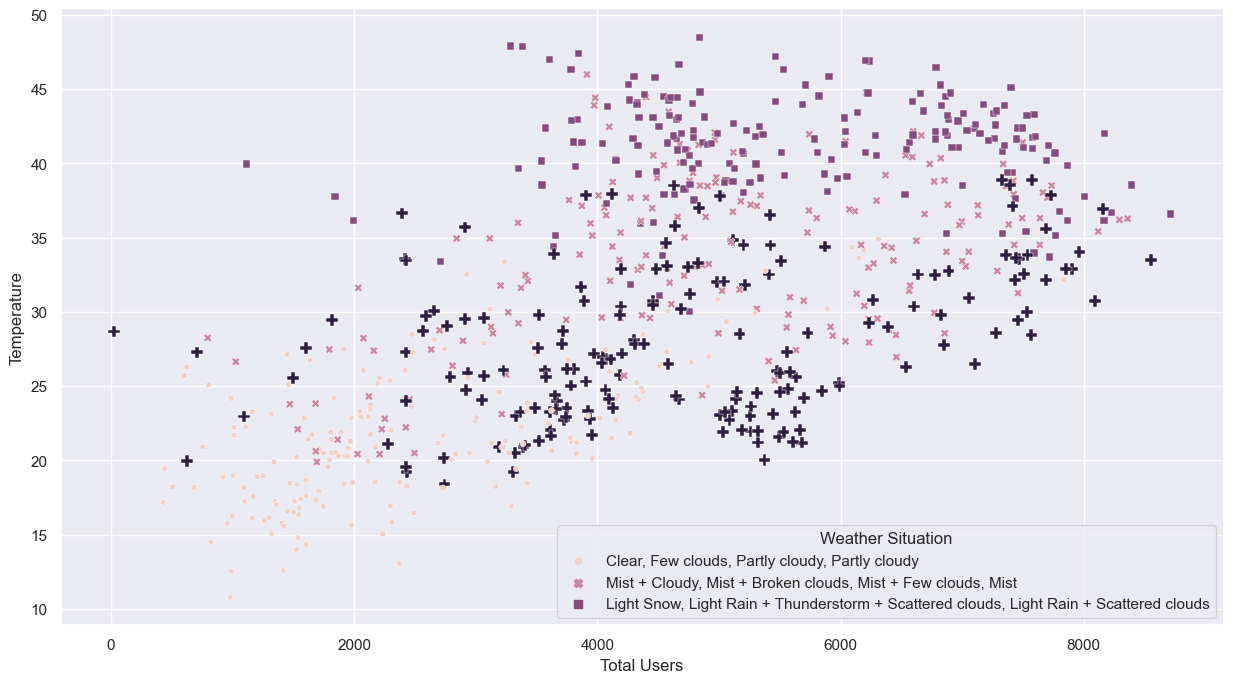

In [107]:
# Set the color palette
colors = ["#FF0B04", "#4374B3","#DB3E79","#B7934F"]
sns.set_palette(sns.color_palette(colors))
# Plot the data, specifying a different color for data points in
ax = sns.scatterplot(x='cnt',y='temp',data=df,hue='season',style = 'season',size = 'season')
labels=["Clear, Few clouds, Partly cloudy, Partly cloudy", "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist", "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"]
h,l = ax.get_legend_handles_labels()
ax.legend(h,labels,title="Weather Situation")
# Customize the axes and title
ax.set_title("")
ax.set_xlabel("Total Users")
ax.set_ylabel("Temperature")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

It seems there is no much difference between the Weather Situation and the Season.